In [249]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy.signal import savgol_filter

In [416]:
# Load data from a CSV file
co2 = pd.read_excel('CO2.xlsx')
hdi = pd.read_excel('HDI.xlsx')
gdp = pd.read_excel('national-gdp.xlsx')

# Data merging and preprocessing
df_merged = pd.merge(co2, hdi, on=['Code', 'Year'], how='left')
df_gdp_merge = pd.merge(df_merged, gdp, on=['Code', 'Year'], how='left').drop(["Entity_y", "Entity"],axis=(1))

df = df_gdp_merge[df_gdp_merge['Region'].notna()]
df = df.reset_index(drop=True)

In [ ]:
# Select the X country as United States:
X_Country = df[df["Code"] == "USA"]

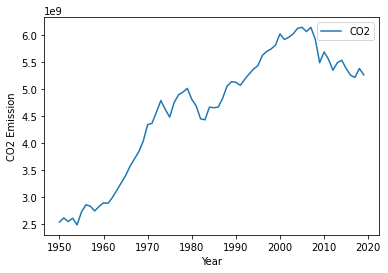

In [ ]:
# Time Series on USA:
X_Country.plot(x="Year", y="CO2", ylabel= 'CO2 Emission')
plt.show()

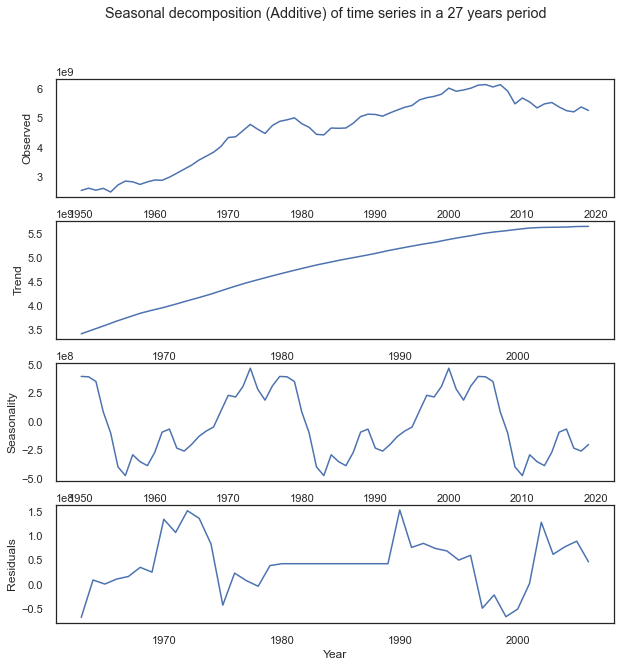

In [392]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
# Decompose the time series into trend, seasonality, and residuals
X_Country_CO2 = X_Country[['CO2', 'Year']]
X_Country_CO2.set_index('Year', inplace=True)
# Convert the data to a Pandas series with a PeriodIndex
result = seasonal_decompose(X_Country_CO2['CO2'], model='additive', period= 27)

# Create the plot
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

result.observed.plot(ax=axs[0])
result.trend.plot(ax=axs[1])
result.seasonal.plot(ax=axs[2])
result.resid.plot(ax=axs[3])

# Add labels and title
axs[0].set_ylabel('Observed')
axs[1].set_ylabel('Trend')
axs[2].set_ylabel('Seasonality')
axs[3].set_ylabel('Residuals')
plt.suptitle('Seasonal decomposition (Additive) of time series in a 27 years period')

# Save the plot or display it
plt.savefig('seasonal_decomposition.png')
plt.show()# 27 (1.5~-0.5)


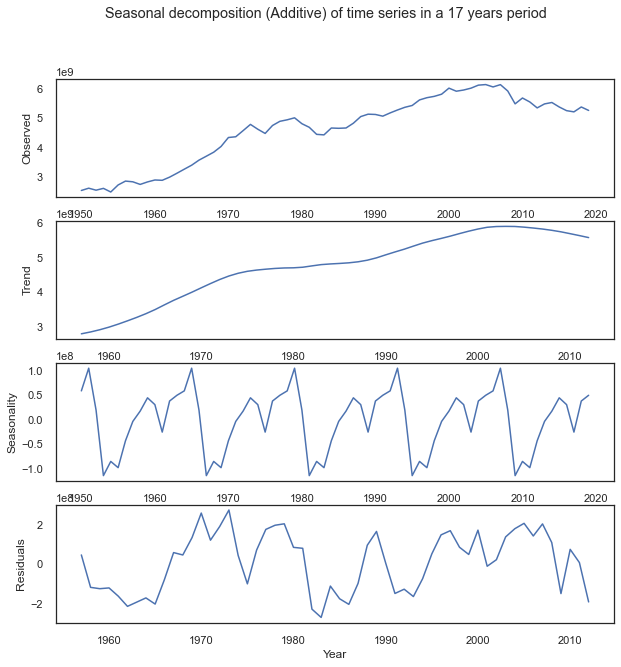

In [408]:
# Convert the data to a Pandas series with a PeriodIndex
result = seasonal_decompose(X_Country_CO2['CO2'], model='additive', period= 14)

# Create the plot
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

result.observed.plot(ax=axs[0])
result.trend.plot(ax=axs[1])
result.seasonal.plot(ax=axs[2])
result.resid.plot(ax=axs[3])

# Add labels and title
axs[0].set_ylabel('Observed')
axs[1].set_ylabel('Trend')
axs[2].set_ylabel('Seasonality')
axs[3].set_ylabel('Residuals')
plt.suptitle('Seasonal decomposition (Additive) of time series in a 17 years period')
# Save the plot or display it
plt.savefig('seasonal_decomposition_16.png')
plt.show()

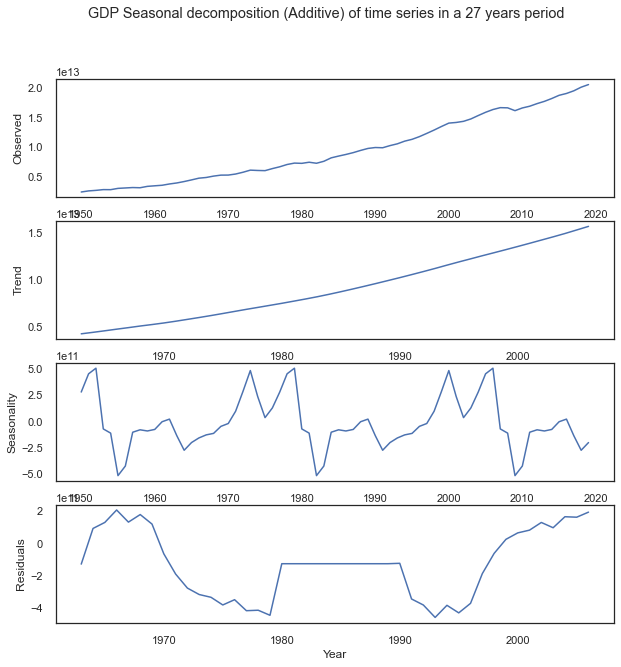

In [412]:
X_Country_CO2 = X_Country[['GDP (output, multiple price benchmarks)', 'Year']]
X_Country_CO2.set_index('Year', inplace=True)
# Convert the data to a Pandas series with a PeriodIndex
result = seasonal_decompose(X_Country_CO2['GDP (output, multiple price benchmarks)'], model='additive', period= 27)

# Create the plot
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

result.observed.plot(ax=axs[0])
result.trend.plot(ax=axs[1])
result.seasonal.plot(ax=axs[2])
result.resid.plot(ax=axs[3])

# Add labels and title
axs[0].set_ylabel('Observed')
axs[1].set_ylabel('Trend')
axs[2].set_ylabel('Seasonality')
axs[3].set_ylabel('Residuals')
plt.suptitle('GDP Seasonal decomposition (Additive) of time series in a 27 years period')
# Save the plot or display it
plt.savefig('seasonal_decom_16.png')
plt.show()

C:\Users\s24Yu\AppData\Local\Temp\ipykernel_30796\1601110225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Country["Y_cumulative"] = X_Country["CO2"].cumsum()


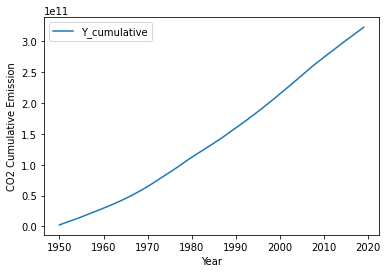

In [ ]:
# Cumulative plot of Y for X
X_Country["Y_cumulative"] = X_Country["CO2"].cumsum()
X_Country.plot(x="Year", y="Y_cumulative", ylabel="CO2 Cumulative Emission")
plt.show()

C:\Users\s24Yu\AppData\Local\Temp\ipykernel_30796\527911188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Country["Y_rate_of_change"] = X_Country["CO2"].pct_change()


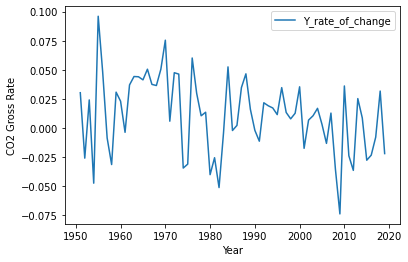

In [ ]:
X_Country["Y_rate_of_change"] = X_Country["CO2"].pct_change()
X_Country.plot(x="Year", y="Y_rate_of_change", ylabel="CO2 Gross Rate")
plt.show()

c:\Users\s24Yu\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


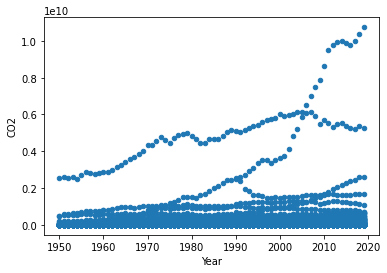

In [ ]:
df.plot(x="Year", y="CO2", kind="scatter")
plt.show()

Entity_x Code  Year           CO2    HDI         Region  \
0          Bermuda  BMU  1970  2.271680e+05    NaN  North America   
1          Bermuda  BMU  1971  2.308320e+05    NaN  North America   
2          Bermuda  BMU  1972  2.528160e+05    NaN  North America   
3          Bermuda  BMU  1973  4.250240e+05    NaN  North America   
4          Bermuda  BMU  1974  4.433440e+05    NaN  North America   
..             ...  ...   ...           ...    ...            ...   
185  United States  USA  2015  5.376578e+09  0.920  North America   
186  United States  USA  2016  5.251758e+09  0.922  North America   
187  United States  USA  2017  5.210957e+09  0.924  North America   
188  United States  USA  2018  5.376657e+09    NaN  North America   
189  United States  USA  2019  5.259144e+09    NaN  North America   

     GDP (output, multiple price benchmarks)  
0                               1.081255e+10  
1                               2.050390e+10  
2                               1.638498e+10  
3                               1.607617e+10  
4                               1.421993e+10  
..                                       ...  
185                             1.878540e+13  
186                             1.909520e+13  
187                             1.954300e+13  
188                             2.015530e+13  
189                             2.059580e+13  

[190 rows x 7 columns]

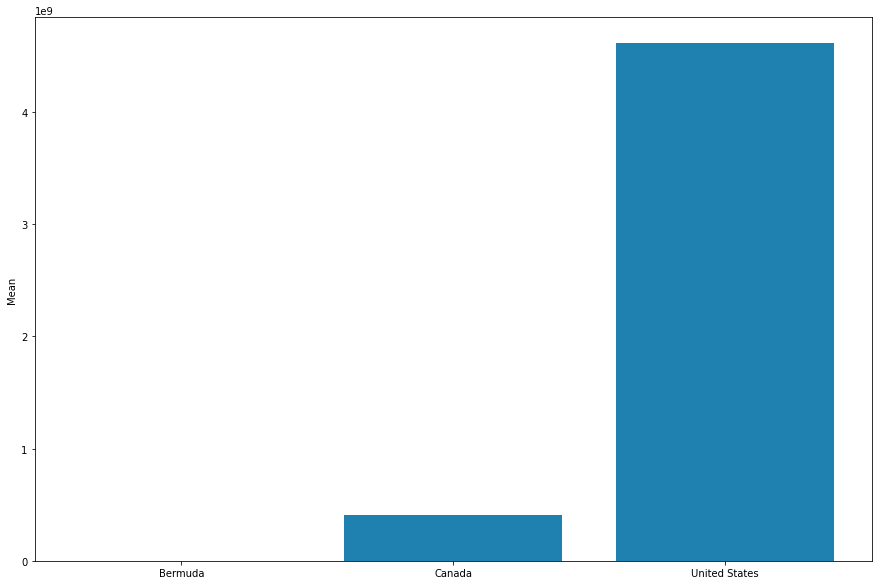

In [ ]:
NA = df[df['Region'] == 'North America']
NA = NA.reset_index(drop=True)
display(NA)
NA_1 = NA.groupby('Entity_x').mean().reset_index()
plt.figure(figsize=(15,10))
plt.bar(range(len(NA_1)), NA_1['CO2'], color="#1e81b0")
plt.xticks(range(len(NA_1)), NA_1['Entity_x'])
plt.ylabel('Mean')
plt.savefig('hst_na.png')

In [ ]:
df['GDP'] = df['GDP (output, multiple price benchmarks)']
df = df.drop('GDP (output, multiple price benchmarks)', axis = (1))


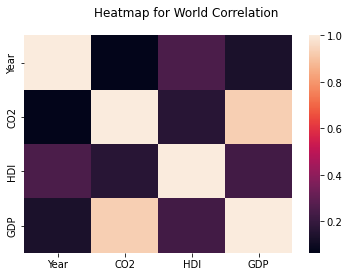

In [ ]:
sns.heatmap(df.corr())
plt.suptitle('Heatmap for World Correlation')
plt.savefig('hm_wrld.png')
plt.show()


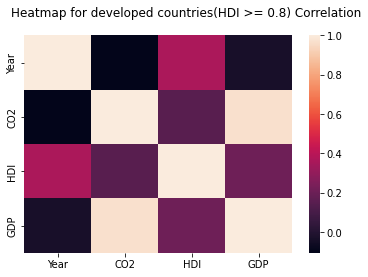

In [ ]:
DEV = df[df['HDI'] >= 0.8]
display
DEV = DEV.reset_index(drop=True)
sns.heatmap(DEV.corr())
plt.suptitle('Heatmap for developed countries(HDI >= 0.8) Correlation')
plt.savefig('hm_dev.png')
plt.show()


In [ ]:
X_Country['GDP'] = X_Country['GDP (output, multiple price benchmarks)']
X_Country = X_Country.drop(['GDP (output, multiple price benchmarks)','Y_rate_of_change'], axis = (1))


C:\Users\s24Yu\AppData\Local\Temp\ipykernel_30796\1650941638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Country['GDP'] = X_Country['GDP (output, multiple price benchmarks)']


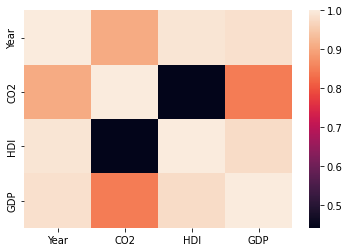

In [ ]:
sns.heatmap(X_Country.corr())
plt.savefig('hm_usa.png')
plt.show()

C:\Users\s24Yu\AppData\Local\Temp\ipykernel_30796\1406352151.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  can["Y_rate_of_change"] = can["CO2"].pct_change()
C:\Users\s24Yu\AppData\Local\Temp\ipykernel_30796\1406352151.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ber["Y_rate_of_change"] = ber["CO2"].pct_change()


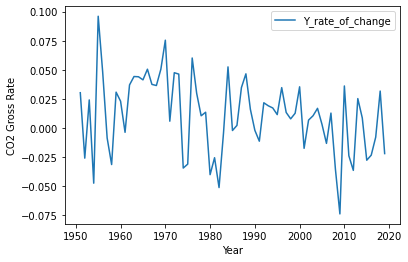

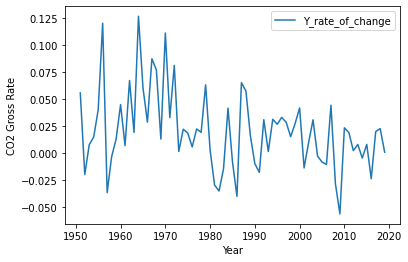

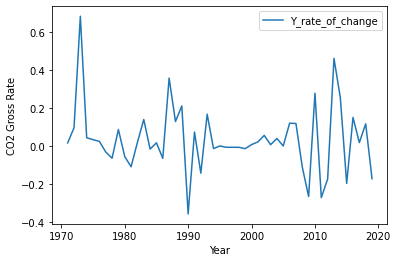

In [ ]:
X_Country.plot(x="Year", y="Y_rate_of_change", ylabel="CO2 Gross Rate")
can = df[df["Code"] == "CAN"]
ber = df[df["Code"] == "BMU"]
can["Y_rate_of_change"] = can["CO2"].pct_change()
ber["Y_rate_of_change"] = ber["CO2"].pct_change()
can.plot(x="Year", y="Y_rate_of_change", ylabel="CO2 Gross Rate")
ber.plot(x="Year", y="Y_rate_of_change", ylabel="CO2 Gross Rate")

plt.show()

Entity_x Code  Year           CO2    HDI  \
0     Antigua and Barbuda  ATG  1970  4.616640e+05    NaN   
1     Antigua and Barbuda  ATG  1971  4.250240e+05    NaN   
2     Antigua and Barbuda  ATG  1972  3.737280e+05    NaN   
3     Antigua and Barbuda  ATG  1973  3.297600e+05    NaN   
4     Antigua and Barbuda  ATG  1974  4.286880e+05    NaN   
...                   ...  ...   ...           ...    ...   
2348        United States  USA  2015  5.376578e+09  0.920   
2349        United States  USA  2016  5.251758e+09  0.922   
2350        United States  USA  2017  5.210957e+09  0.924   
2351        United States  USA  2018  5.376657e+09    NaN   
2352        United States  USA  2019  5.259144e+09    NaN   

                         Region  GDP (output, multiple price benchmarks)  
0     Latin America & Caribbean                             4.001085e+08  
1     Latin America & Caribbean                             4.306256e+08  
2     Latin America & Caribbean                             4.613090e+08  
3     Latin America & Caribbean                             4.962153e+08  
4     Latin America & Caribbean                             4.848474e+08  
...                         ...                                      ...  
2348              North America                             1.878540e+13  
2349              North America                             1.909520e+13  
2350              North America                             1.954300e+13  
2351              North America                             2.015530e+13  
2352              North America                             2.059580e+13  

[2353 rows x 7 columns]

Text(0, 0.5, 'Mean of the CO2 Emmision')

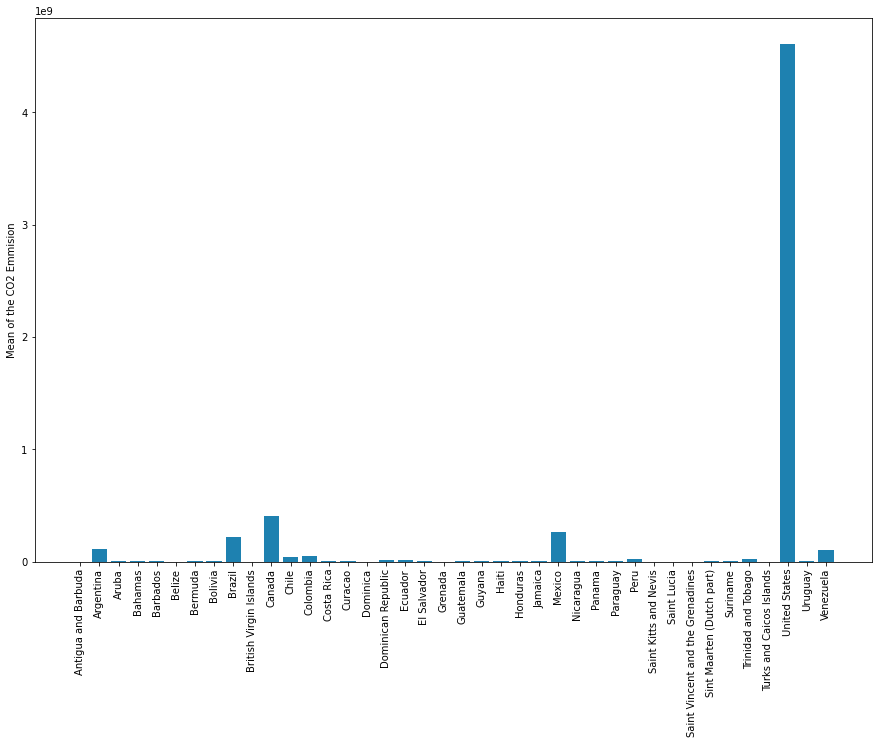

In [ ]:
AM = df[df['Region'] == 'Latin America & Caribbean'] 
NA = df[df['Region'] == 'North America']
AM = pd.concat([AM, NA], axis = 0)
AM = AM.reset_index(drop=True)
display(AM)
AM_1 = AM.groupby('Entity_x').mean().reset_index()
plt.figure(figsize=(15,10))
plt.bar(range(len(AM_1)), AM_1['CO2'], color='#1e81b0')
# plt.bar(range(len(AM_1)), AM_1['CO2'], color='#1e81b0')
plt.xticks(range(len(AM_1)), AM_1['Entity_x'], rotation='vertical')
plt.ylabel('Mean of the CO2 Emmision')

Text(0, 0.5, 'Mean of the GDP Emmision')

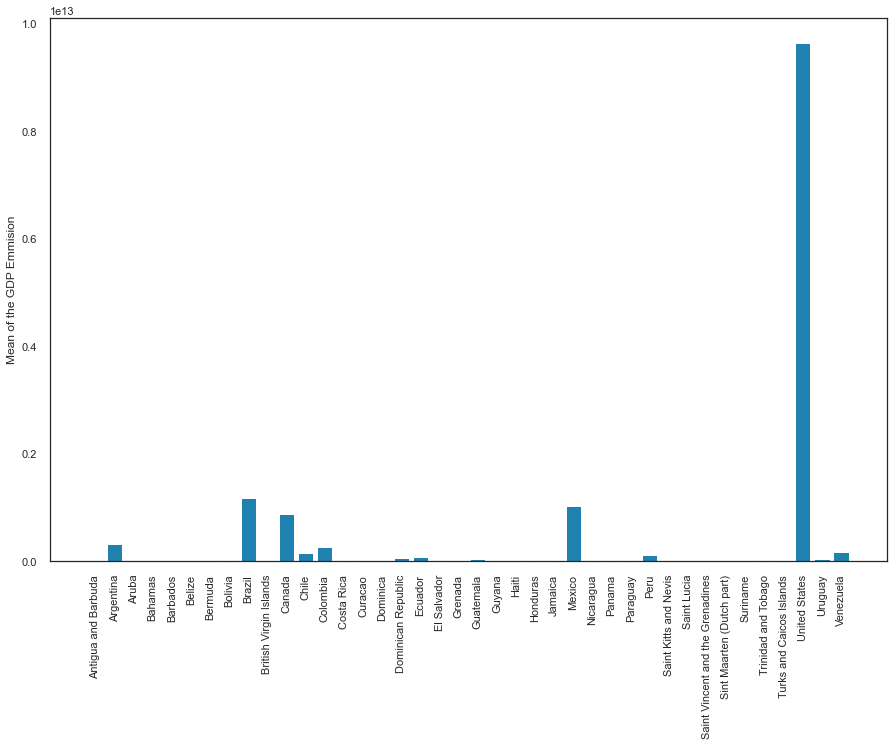

In [413]:
plt.figure(figsize=(15,10))
plt.bar(range(len(AM_1)), AM_1['GDP (output, multiple price benchmarks)'], color='#1e81b0')
# plt.bar(range(len(AM_1)), AM_1['CO2'], color='#1e81b0')
plt.xticks(range(len(AM_1)), AM_1['Entity_x'], rotation='vertical')
plt.ylabel('Mean of the GDP Emmision')

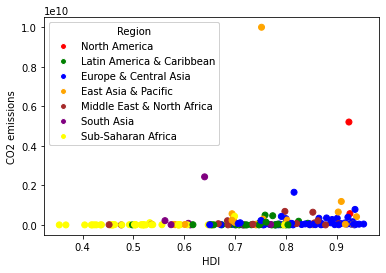

In [ ]:
fig, ax = plt.subplots()
world_2017 = df[df['Year']==2017]
# world = df.drop('World', axis=1)
# create a mapping from region to color
region_colors = {
    'North America': 'red',
    'Latin America & Caribbean': 'green',
    'Europe & Central Asia': 'blue',
    'East Asia & Pacific': 'orange',
    'Middle East & North Africa': 'brown',
    'South Asia': 'purple',
    'Sub-Saharan Africa': 'yellow',
}
# create a list of colors based on the region of each data point
colors = [region_colors[region] for region in world_2017.Region]


scatter = ax.scatter(world_2017.HDI, world_2017.CO2, c=colors)

# add legend
# legend1 = ax.legend(*scatter.legend_elements(), title="Region")

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=region, markerfacecolor=color)
    for region, color in region_colors.items()
]
legend1 = ax.legend(handles=legend_elements, title="Region")
ax.add_artist(legend1)


# add axis labels
ax.set_xlabel('HDI')
ax.set_ylabel('CO2 emissions')
plt.savefig('sct_17.png')
plt.show()

Entity_x Code  Year          CO2    HDI  \
47                 Albania  ALB  2017    5564149.0  0.785   
107                Algeria  DZA  2017  166411380.0  0.754   
157                 Angola  AGO  2017   24304090.0  0.581   
237    Antigua and Barbuda  ATG  2017     490976.0  0.780   
307              Argentina  ARG  2017  186898880.0  0.825   
...                    ...  ...   ...          ...    ...   
9987             Venezuela  VEN  2017  140384980.0  0.761   
10037              Vietnam  VNM  2017  233040750.0  0.694   
10068                Yemen  YEM  2017   10588620.0  0.452   
10133               Zambia  ZMB  2017    6842875.0  0.588   
10199             Zimbabwe  ZWE  2017    9596071.0  0.535   

                           Region  GDP (output, multiple price benchmarks)  
47          Europe & Central Asia                             3.497495e+10  
107    Middle East & North Africa                             4.721880e+11  
157            Sub-Saharan Africa                             2.301510e+11  
237     Latin America & Caribbean                             1.367487e+09  
307     Latin America & Caribbean                             1.022510e+12  
...                           ...                                      ...  
9987    Latin America & Caribbean                             1.276834e+10  
10037         East Asia & Pacific                             6.472250e+11  
10068  Middle East & North Africa                             3.978057e+10  
10133          Sub-Saharan Africa                             5.333115e+10  
10199          Sub-Saharan Africa                             4.431674e+10  

[169 rows x 7 columns]

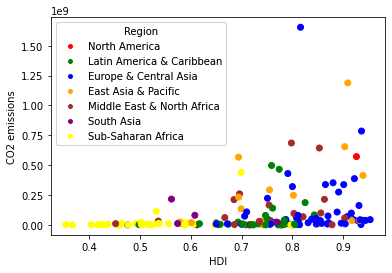

In [ ]:
fig, ax = plt.subplots()

world_2017 = df[df['Year']==2017]
world_2017 = world_2017[world_2017['CO2'] <= 2e9]
world_2017 = world_2017[world_2017['HDI'] != 0]
world_2017_nona = world_2017[world_2017['HDI'].notna()]
world_2017_nona = world_2017_nona[world_2017_nona['CO2'] != 0]
world_2017_nona = world_2017_nona[world_2017_nona['CO2'].notna()]
# create a list of colors based on the region of each data point

# create a list of colors based on the region of each data point
colors = [region_colors[region] for region in world_2017_nona.Region]
display(world_2017_nona)

scatter = ax.scatter(world_2017_nona.HDI, world_2017_nona.CO2, c=colors)
display(scatter)
# add legend
#legend1 = ax.legend(*scatter.legend_elements(), title="Region")

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=region, markerfacecolor=color)
    for region, color in region_colors.items()
]
legend1 = ax.legend(handles=legend_elements, title="Region")
ax.add_artist(legend1)


# add axis labels
ax.set_xlabel('HDI')
ax.set_ylabel('CO2 emissions')
plt.savefig('sct_nona.png')
plt.show()


Entity_x Code  Year          CO2  HDI  \
49                 Albania  ALB  2019    4947485.0  NaN   
109                Algeria  DZA  2019  179504830.0  NaN   
159                 Angola  AGO  2019   21818020.0  NaN   
189               Anguilla  AIA  2019     153888.0  NaN   
239    Antigua and Barbuda  ATG  2019     498304.0  NaN   
...                    ...  ...   ...          ...  ...   
9989             Venezuela  VEN  2019   89111144.0  NaN   
10039              Vietnam  VNM  2019  341004930.0  NaN   
10070                Yemen  YEM  2019   12683843.0  NaN   
10135               Zambia  ZMB  2019    7747163.0  NaN   
10201             Zimbabwe  ZWE  2019   11114607.0  NaN   

                           Region  GDP (output, multiple price benchmarks)  
49          Europe & Central Asia                             3.610304e+10  
109    Middle East & North Africa                             5.074880e+11  
159            Sub-Saharan Africa                             2.278560e+11  
189            Sub-Saharan Africa                             2.256805e+08  
239     Latin America & Caribbean                             1.603854e+09  
...                           ...                                      ...  
9989    Latin America & Caribbean                             7.160107e+09  
10039         East Asia & Pacific                             7.241230e+11  
10070  Middle East & North Africa                             5.182806e+10  
10135          Sub-Saharan Africa                             5.678371e+10  
10201          Sub-Saharan Africa                             4.082657e+10  

[182 rows x 7 columns]

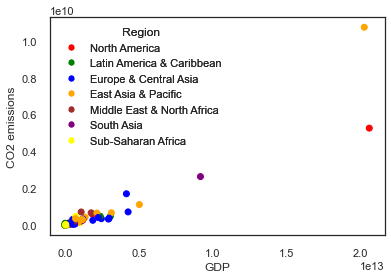

In [414]:
fig, ax = plt.subplots()

world_2019 = df[df['Year']==2019]
# world_2017 = world_2017[world_2017['CO2'] <= 2e9]
world_2019 = world_2019[world_2019['CO2'] != 0]
world_2019_nona = world_2019[world_2019['CO2'].notna()]
world_2019_nona = world_2019_nona[world_2019_nona['CO2'] != 0]
world_2019_nona = world_2019_nona[world_2019_nona['CO2'].notna()]
# create a list of colors based on the region of each data point

# create a list of colors based on the region of each data point
colors = [region_colors[region] for region in world_2019_nona.Region]
display(world_2019_nona)

scatter = ax.scatter(world_2019_nona['GDP (output, multiple price benchmarks)'], world_2019_nona.CO2, c=colors)
display(scatter)
# add legend
#legend1 = ax.legend(*scatter.legend_elements(), title="Region")

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=region, markerfacecolor=color)
    for region, color in region_colors.items()
]
legend1 = ax.legend(handles=legend_elements, title="Region")
ax.add_artist(legend1)


# add axis labels
ax.set_xlabel('GDP')
ax.set_ylabel('CO2 emissions')
plt.savefig('sct_nona.png')
plt.show()

Text(0, 0.5, 'Mean of the HDI')

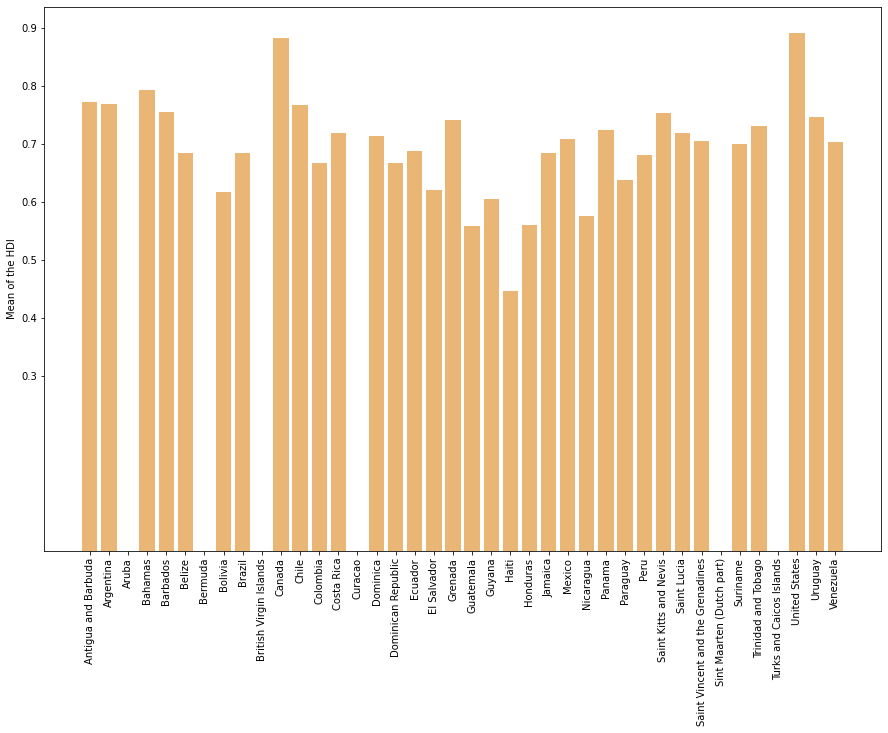

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(range(len(AM_1)), AM_1['HDI'], color='#eab676')
plt.xticks(range(len(AM_1)), AM_1['Entity_x'], rotation='vertical')
plt.yticks(np.arange(0.3, 1, 0.1))
plt.ylabel('Mean of the HDI')

In [ ]:
from pandas_profiling import ProfileReport

USA = X_Country.drop(['Entity_x','Code','Region'], axis = (1))
profile_df = USA.profile_report()
profile_df

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [406]:
USA = X_Country.drop(['Entity_x','Code','Region','Year'], axis = (1))
profile_df = USA.profile_report()
profile_df
#USA data profiling without year:

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
wrld_pfl = df.drop(['Entity_x','Code','Region'], axis = (1))
profile_df = wrld_pfl.profile_report()
profile_df
#World data profiling:

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [315]:
X_Country = df[df["Code"] == "USA"]
X_Country.to_csv("usa_data", index = False)

In [403]:
from pycaret.regression import *
usa_data = X_Country.drop(['Entity_x', 'Region', 'HDI', 'Code'], axis=1)

In [273]:

setup(data=usa_data, target='CO2')
exp_reg = compare_models()
#consider a linear regresson model
lr = create_model('lr')


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr_tuned = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


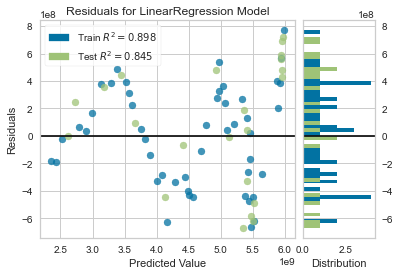

In [ ]:
#Below is the snipet of generating the corresponding graphs
plot_model(lr_tuned)

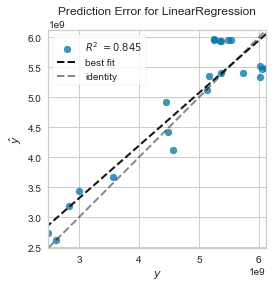

In [ ]:
plot_model(lr_tuned, plot = 'error')

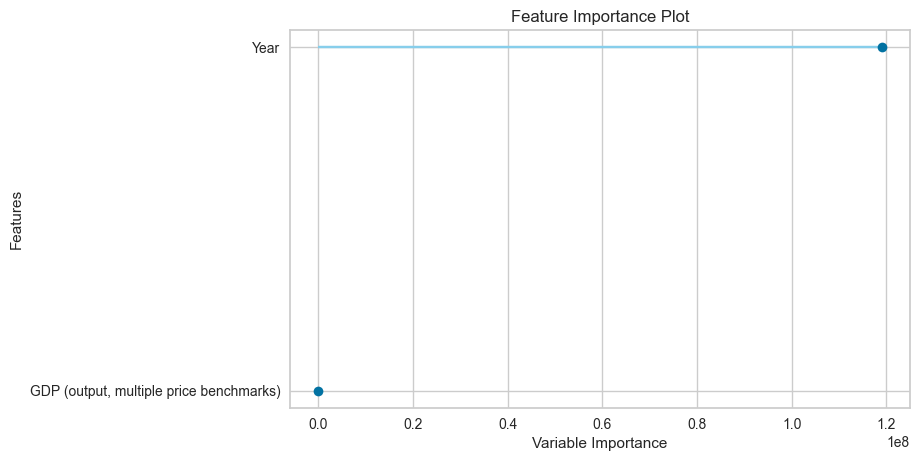

In [ ]:
plot_model(lr_tuned, plot = 'feature')
#The Year feature is the most important feature to do this regression analysis

In [ ]:
final_lr = finalize_model(lr_tuned)

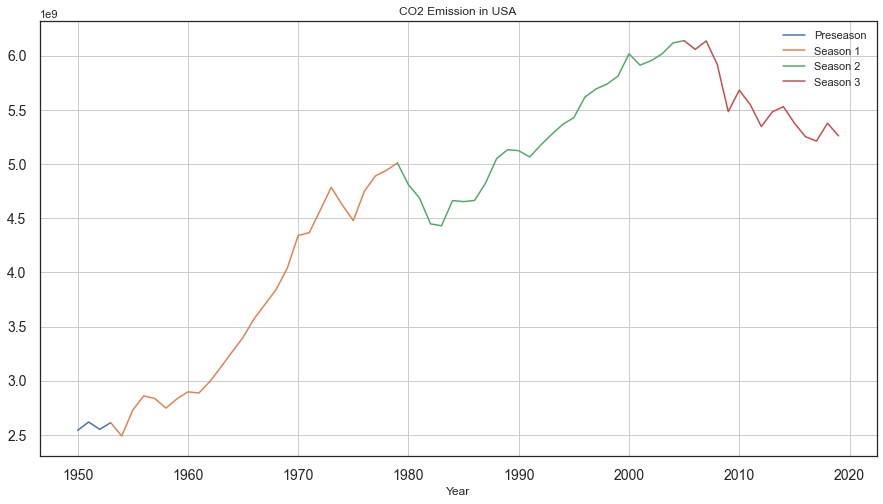

<Figure size 432x288 with 0 Axes>

In [405]:
preseason.CO2.plot(figsize=(15,8), title= 'CO2 Emission in USA', fontsize=14, label='Preseason')
season1.CO2.plot(figsize=(15,8), title= 'CO2 Emission in USA', fontsize=14, label='Season 1')
season2.CO2.plot(figsize=(15,8), title= 'CO2 Emission in USA', fontsize=14, label='Season 2')
season3.CO2.plot(figsize=(15,8), title= 'CO2 Emission in USA', fontsize=14, label='Season 3')

plt.legend()
plt.grid()
plt.show()
plt.savefig('time series.png')

